# House Price Predication

## Table of Contents

1. [Introduction](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Missing data Analysis without data profiling](#section4)<br>
5. [SalePrice Normalization](#section5)<br>
6. [Drop Columns having more null values](#section6)<br>
7. [Data Visualization](#section7)<br>
    - 7.1 [Construction of houses for years](#section701)<br>
    - 7.2 [Neighborhood  and overall condition of houses](#section702)<br>
    - 7.3 [What is the type of road access to the house?](#section703)<br>
    - 7.4 [Correlation between variables](#section704)<br>
    - 7.5 [Zoomed Heat Map](#section705)<br>
8. [Feature Engineering](#section8)<br>
9. [Visualization of Highly Correlated Variables](#section9)<br>
10. [Model and Predictions](#section10)<br>
    - 10.1 [Preparing X and y using pandas](#section1001)<br>
    - 10.2 [Splitting X and y into training and test datasets.](#section1002)<br>
11. [Linear Regression](#section11)<br>
    - 11.1 [Linear Regression in scikit-learn](#section1101)<br>
    - 11.2 [Using the Model for Prediction](#section1102)<br>
    - 11.3 [Finding Error Values](#section1103)<br>
12. [Decision Tree Regressor](#section12)<br>
    - 12.1 [Decision Tree in scikit-learn](#section1201)<br>
    - 12.2 [Using the Model for Prediction](#section1202)<br>
13. [Random Forest Regressor](#section13)<br>
    - 13.1 [Random Forest in scikit-learn](#section1301)<br>
    - 13.2 [Using the Model for Prediction](#section1302)<br>

## 1. Introduction


This notebook is going to be focused on solving the problem of predicting house prices for house buyers and house sellers.

A house value is simply more than location and square footage. It is a dream for every person. House buyer check for the features before buying an house. In the dataset available have all the features and we will use this data to analyze and predict house prices.

We will follow the steps that allow us to ensure the cleanest, most realistic data for our model to make accurate predictions from

    1. Load Data and Packages.
    2. Analyzing the test variable "SalePrice"
    3. Missing data and Clean Data
    4. Feature Engineering
    5. Modelling and predictions.
    
 A benefit to this study is that we can have two clients at the same time with no conflict of interest!

Client Housebuyer: This client wants to find their next dream home with a reasonable price tag. They have their locations of interest ready. Now, they want to know if the house price matches the house value. With this study, they can understand which features (ex. Number of bathrooms, location, etc.) influence the final price of the house. If all matches, they can ensure that they are getting a fair price.

Client Houseseller: Think of the average house-flipper. This client wants to take advantage of the features that influence a house price the most. They typically want to buy a house at a low price and invest on the features that will give the highest return. For example, buying a house at a good location but small square footage. The client will invest on making rooms at a small cost to get a large return.


##Import Packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpb
import matplotlib.pyplot as plt
import pandas_profiling
from scipy import stats
import seaborn as sb
%matplotlib inline

## 2. Data Loading and Description

###Data Description

This dataset consists of 80 Columns.This is a multivariables both Numerical and Categorical Variables.  Following are the breif introduction of each and every column in the dataset.

| Column Name            | Description                                                                                                                       |
| ------------------------- |: ------------------------------------------------                                                               :|
| SalePrice  | The property's sale price in dollars. This is the target variable that you're trying to predict |
| MSSubClass| The building class     |
| MSZoning| The general zoning classification     |
|  LotFrontage| Linear feet of street connected to property    |
|  LotArea| Lot size in square feet    |
|  Street| Type of road access    |
|   Alley| Type of alley access    |
|   LotShape| General shape of property   |
|  LandContour| Flatness of the property   |
| Utilities| Type of utilities available    |
| LotConfig| Lot configuration    |
| LandSlope| Slope of property     |
| Neighborhood| Physical locations within Ames city limits     |
| Condition1| Proximity to main road or railroad    |
| Condition2| Proximity to main road or railroad (if a second is present)    |
| BldgType| Type of dwelling     |
| HouseStyle| Style of dwelling    |
| OverallQual| Overall material and finish quality  |
| OverallCond| Overall condition rating  |
| YearBuilt| Original construction date  |
| YearRemodAdd| Remodel date |
| RoofStyle| Type of roof    |
| RoofMatl| Roof material   |
| Exterior1st| Exterior covering on house     |
| Exterior2nd| Exterior covering on house (if more than one material)    |
| MasVnrType| Masonry veneer type     |
| MasVnrArea| Masonry veneer area in square feet     |
| ExterQual| Exterior material quality      |
| ExterCond| Present condition of the material on the exterior    |
| Foundation| Type of foundation    |
| BsmtQual| Height of the basement  |
| BsmtCond| General condition of the basement  |
| BsmtExposure| Walkout or garden level basement walls |
| BsmtFinType1| Quality of basement finished area |
| BsmtFinSF1| Type 1 finished square feet   |
| BsmtFinType2| Quality of second finished area (if present)   |
| BsmtFinSF2| Type 2 finished square feet   |
| BsmtUnfSF| Unfinished square feet of basement area    |
| TotalBsmtSF| Total square feet of basement area   |
| Heating| Type of heating    |
| HeatingQC| Heating quality and condition  |
| CentralAir| Central air conditioning  |
| Electrical| Electrical system    |
| 1stFlrSF| First Floor square feet  |
| 2ndFlrSF| Second floor square feet  |
| LowQualFinSF| Low quality finished square feet (all floors) |
| GrLivArea| Above grade (ground) living area square feet  |
| BsmtFullBath| Basement full bathrooms
| BsmtHalfBath| Basement half bathrooms   |
| FullBath| Full bathrooms above grade   |
| HalfBath| Half baths above grade  |
| Bedroom| Number of bedrooms above basement level  |
| Kitchen| Number of kitchens  |
| KitchenQual| Kitchen quality  |
| TotRmsAbvGrd| Total rooms above grade (does not include bathrooms)   |
| Functional| Home functionality rating  |
| Fireplaces| Number of fireplaces  |
| FireplaceQu| Fireplace quality  |
| GarageType| Garage location  |
| GarageYrBlt| Year garage was built  |
| GarageFinish| Interior finish of the garage  |
| GarageCars| Size of garage in car capacity  |
| GarageArea| Size of garage in square feet  |
| GarageQual| Garage quality  |
| GarageCond| Garage condition  |
| PavedDrive| Paved driveway  |
| WoodDeckSF| Wood deck area in square feet  |
| OpenPorchSF| Open porch area in square feet  |
| EnclosedPorch| Enclosed porch area in square feet  |
| 3SsnPorch| Three season porch area in square feet  |
| ScreenPorch| Screen porch area in square feet   |
| PoolArea| Pool area in square feet   |
| PoolQC| Pool quality  |
| Fence| Fence quality  |
| MiscFeature| Miscellaneous feature not covered in other categories  |
|MiscVal| $Value of miscellaneous feature   |
| MoSold| Month Sold  |
| YrSold| Year Sold  |
| SaleType| Type of sale |
| SaleCondition| Condition of sale  |

### Data Loading

In [0]:
housedata = pd.read_csv("house_data.csv")
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* Id column has no meaning. Hence dropped


In [0]:
housedata.drop(columns=['Id'],inplace=True)

In [0]:
housedata.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



*   Info function gives information about variables in dataset and its types.


In [0]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

##Data Profiling

##3. Preprocessing

In [0]:
housepriceprofile = pandas_profiling.ProfileReport(housedata)
housepriceprofile.to_file(outputfile="house_price_pre_profiling.html")

Processed data with pandas profiling and the data set have following anamolies.

1.   2ndFlrSF has 829 / 56.8% zeros Zeros
2.   3SsnPorch has 1436 / 98.4% zeros Zeros
3.   Alley has 1369 / 93.8% missing values Missing
4.   BsmtCond has 37 / 2.5% missing values Missing
5.   BsmtExposure has 38 / 2.6% missing values Missing
6.   BsmtFinSF1 has 467 / 32.0% zeros Zeros
7.   BsmtFinSF2 has 1293 / 88.6% zeros Zeros
8.   BsmtFinType1 has 37 / 2.5% missing values Missing
9.   BsmtFinType2 has 38 / 2.6% missing values Missing
10. BsmtFullBath has 856 / 58.6% zeros Zeros
11. BsmtHalfBath has 1378 / 94.4% zeros Zeros
12. BsmtQual has 37 / 2.5% missing values Missing
13. BsmtUnfSF has 118 / 8.1% zeros Zeros
14. EnclosedPorch has 1252 / 85.8% zeros Zeros
15. Fence has 1179 / 80.8% missing values Missing
16. FireplaceQu has 690 / 47.3% missing values Missing
17. Fireplaces has 690 / 47.3% zeros Zeros
18. GarageArea has 81 / 5.5% zeros Zeros
19. GarageCars has 81 / 5.5% zeros Zeros
20. GarageCond has 81 / 5.5% missing values Missing
21. GarageFinish has 81 / 5.5% missing values Missing
22. GarageQual has 81 / 5.5% missing values Missing
23. GarageType has 81 / 5.5% missing values Missing
24. GarageYrBlt has 81 / 5.5% missing values Missing
25. HalfBath has 913 / 62.5% zeros Zeros
26. LotFrontage has 259 / 17.7% missing values Missing
27. LowQualFinSF has 1434 / 98.2% zeros Zeros
28. MasVnrArea has 861 / 59.0% zeros Zeros
29. MiscFeature has 1406 / 96.3% missing values Missing
30. MiscVal has 1408 / 96.4% zeros Zeros
31. MiscVal is highly skewed (γ1 = 24.477) Skewed
32. OpenPorchSF has 656 / 44.9% zeros Zeros
33. PoolArea has 1453 / 99.5% zeros Zeros
34. PoolQC has 1453 / 99.5% missing values Missing
35. ScreenPorch has 1344 / 92.1% zeros Zeros
36. TotalBsmtSF has 37 / 2.5% zeros Zeros
37. WoodDeckSF has 761 / 52.1% zeros Zeros

##4.  Missing data Analysis without data profiling

Missing data analyses without data profiling module and display using barplot.

In [0]:
house_data_na = (housedata.isnull().sum()/len(housedata)) * 100
house_data_na = house_data_na[house_data_na > 0]
house_data_na.sort_values(inplace=True,ascending=False)
house_data_na

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [0]:
house_data_na = house_data_na.to_frame()
house_data_na.columns = ['Count']
house_data_na.index.names = ['Name']
house_data_na['Name'] = house_data_na.index

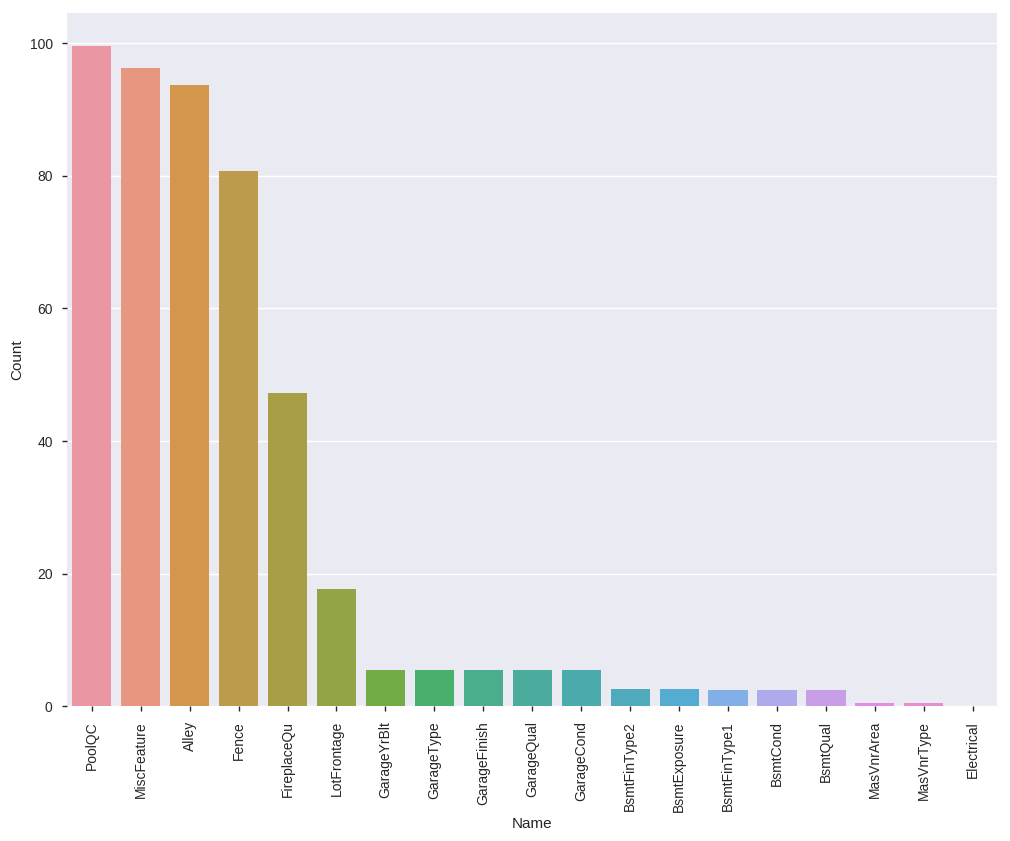

In [0]:
plt.figure(figsize=(12,9))
sb.barplot(x='Name',y='Count',data=house_data_na)
plt.xticks(rotation=90)
plt.show()

* PoolQC, MiscFeature, Alley variables are having more than 90% missing data.
* Fence variable is having 80% missing data.

Most of the data in these fields are missed. It is difficult to analyze these columns.

## 5. SalePrice Normalization

"SalePrice" column is having bigger numbers and right skewed because of outliers. Hence Normalizing the column with log transformation. Further analysis it is required that target variable should be Normally Distributed.

Text(0, 0.5, 'Frequency')

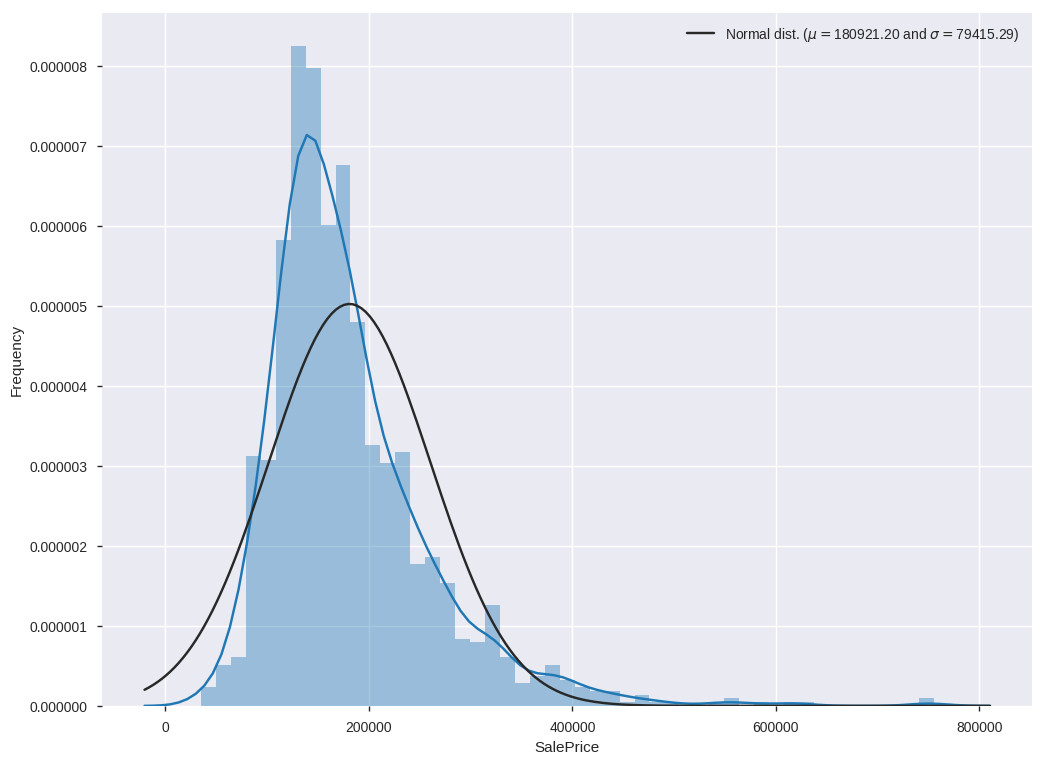

In [0]:
#Normalize SalePrice because number is very big

plt.subplots(figsize=(12,9))
sb.distplot(housedata['SalePrice'],fit=stats.norm)
(mu,sigma) = stats.norm.fit(housedata['SalePrice'])
plt.legend(['Normal dist. ($\mu=${:.2f} and $\sigma = ${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

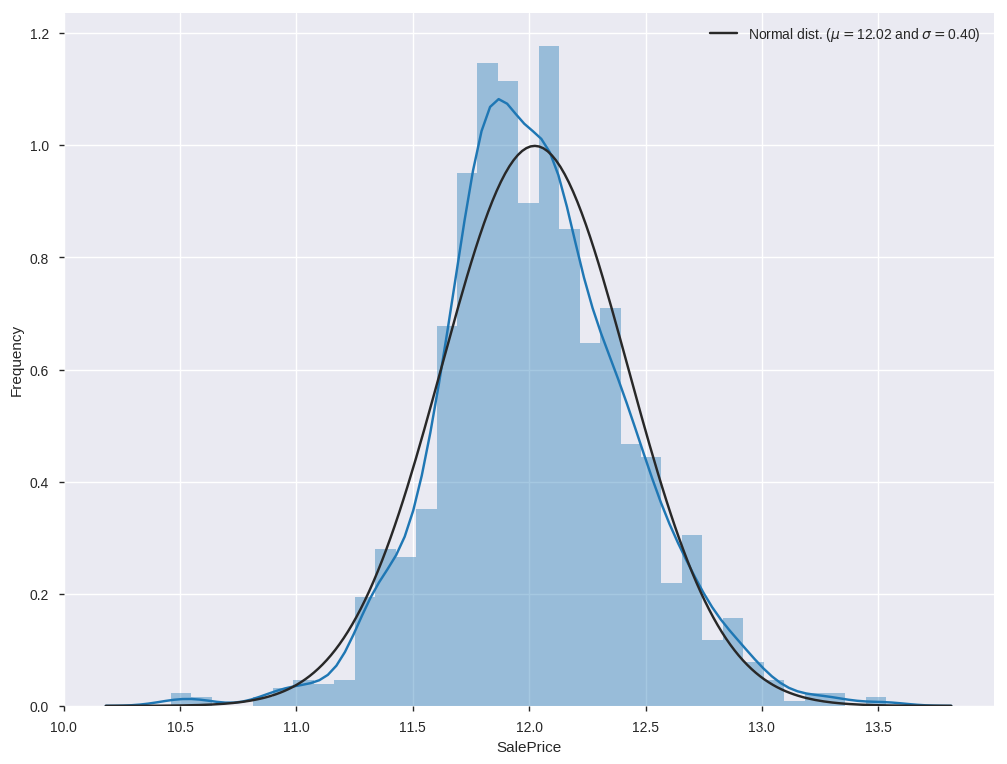

In [0]:
housedata['SalePrice'] = np.log1p(housedata['SalePrice'])

plt.subplots(figsize = (12,9))
sb.distplot(housedata['SalePrice'],fit=stats.norm)
(mu,sigma) = stats.norm.fit(housedata['SalePrice'])
plt.legend(['Normal dist. ($\mu=${:.2f} and $\sigma = ${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')

* From above graph, we can say that SalePrice is normally distributed.


* TotalSqFt column will represent the complete built-up area of an house. As we have separate columns for each level of the house.

In [0]:
housedata['TotalSqFt'] = housedata['TotalBsmtSF'] + housedata['TotRmsAbvGrd'] + housedata['1stFlrSF'] + housedata['2ndFlrSF']

In [0]:
housedata.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

##6. Drop Columns having more null values

*  These columns are having more than 80% null values. Hence drop these columns.


In [0]:
housedata.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],inplace=True)
housedata.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

For missing data, Replacing int and float types with 0 and object type with "None". To ensure all the data to be consistent across all the columns.

In [0]:
GarageCols = ['GarageType','GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','GarageCond']

for col in GarageCols:
    
    if (housedata[col].dtypes == np.float64) or (housedata[col].dtypes == np.int64):
        housedata[col].fillna(value=0,inplace=True)
    if (housedata[col].dtypes == np.object):
        housedata[col].fillna(value="None",inplace=True)
        

In [0]:
BsmtCols = ['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2']

for col in BsmtCols:
    
    if (housedata[col].dtypes == np.float64) or (housedata[col].dtypes == np.int64):
        housedata[col].fillna(value=0,inplace=True)
    if (housedata[col].dtypes == np.object):
        housedata[col].fillna(value="None",inplace=True)

In [0]:
housedata['LotFrontage'].fillna(value=(housedata['LotFrontage'].median()),inplace=True)
housedata['Electrical'].fillna(value=(housedata['Electrical'].mode()[0]), inplace=True)
housedata['FireplaceQu'].fillna(value="None", inplace=True)
housedata['MasVnrArea'].fillna(value=0, inplace=True)
housedata['MasVnrType'].fillna(value="None", inplace=True)

## 7. Data Visualization

### 7.1 Construction of houses for years

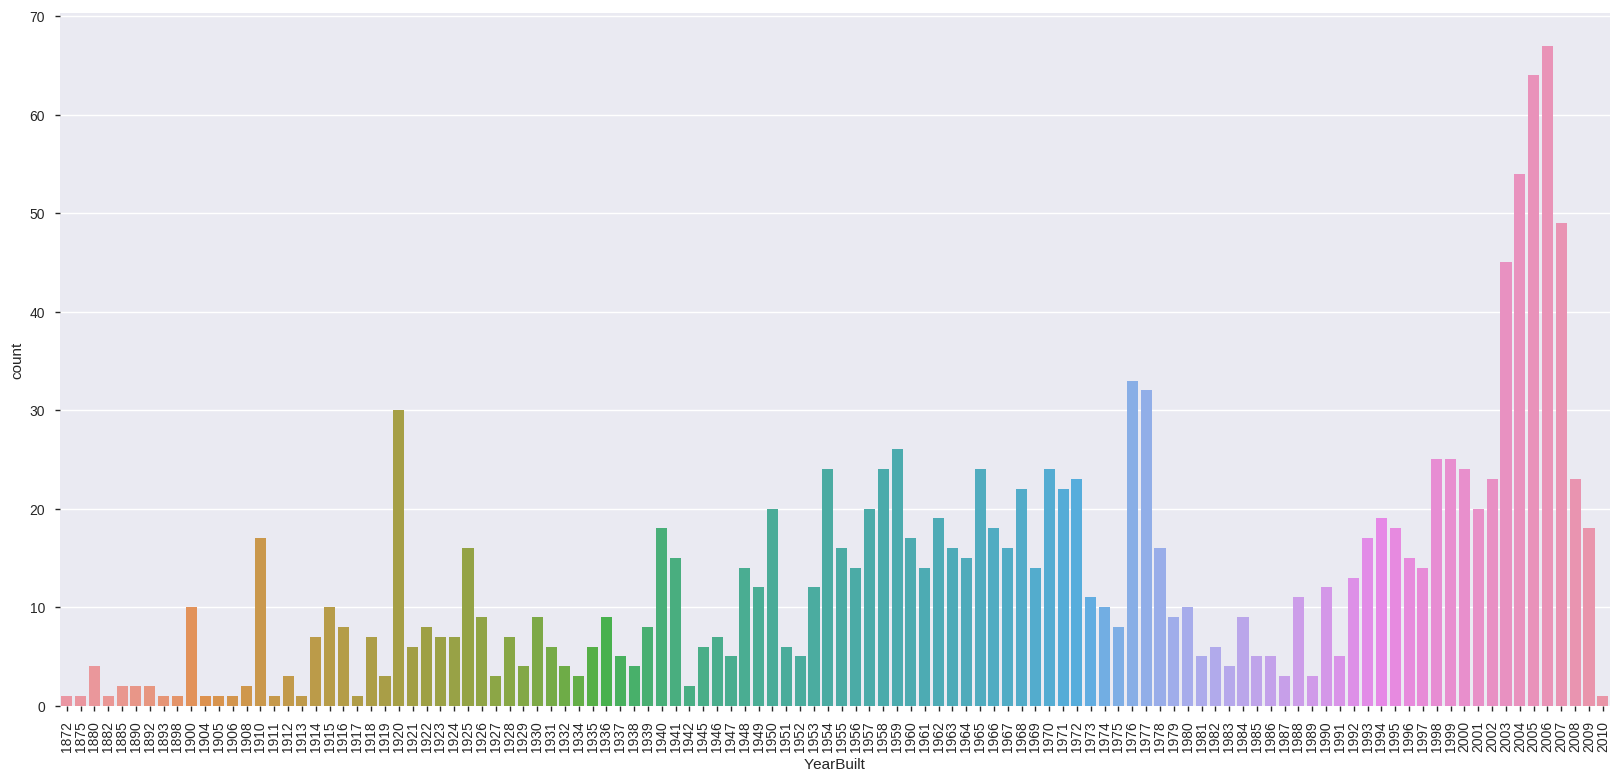

In [0]:
plt.figure(figsize=(20,9))
sb.countplot(x='YearBuilt',data=housedata)
plt.xticks(rotation=90)
plt.show()

If we observe the graph, We can say  

*   From year 2002 to 2009, demand for construction of houses are high
*   From year 1872 to 1913, demand for house construction is very less. 



###7.2 Neighborhood  and overall condition of houses

OverallCond are having values range from 0 to 10. Bid the column with "<5" for range 0 - 5 and "<10" for range 5 - 10 for further analysis.

In [0]:
housedataAnalysis = pd.DataFrame(data=housedata)

In [0]:
housedataAnalysis['OverallCondRange'] = housedata['OverallCond'].apply(lambda x: "< 5" if (x >= 0) & (x <= 5) else "< 10" )
housedataAnalysis

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSqFt,OverallCondRange
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247699,2574,< 5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109016,2530,< 10
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317171,2712,< 5
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849405,2480,< 5
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429220,3352,< 5
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,11.870607,2163,< 5
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,12.634606,3387,< 5
7,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,12.206078,3204,< 10
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,11.774528,2734,< 5
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,

Plot countplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

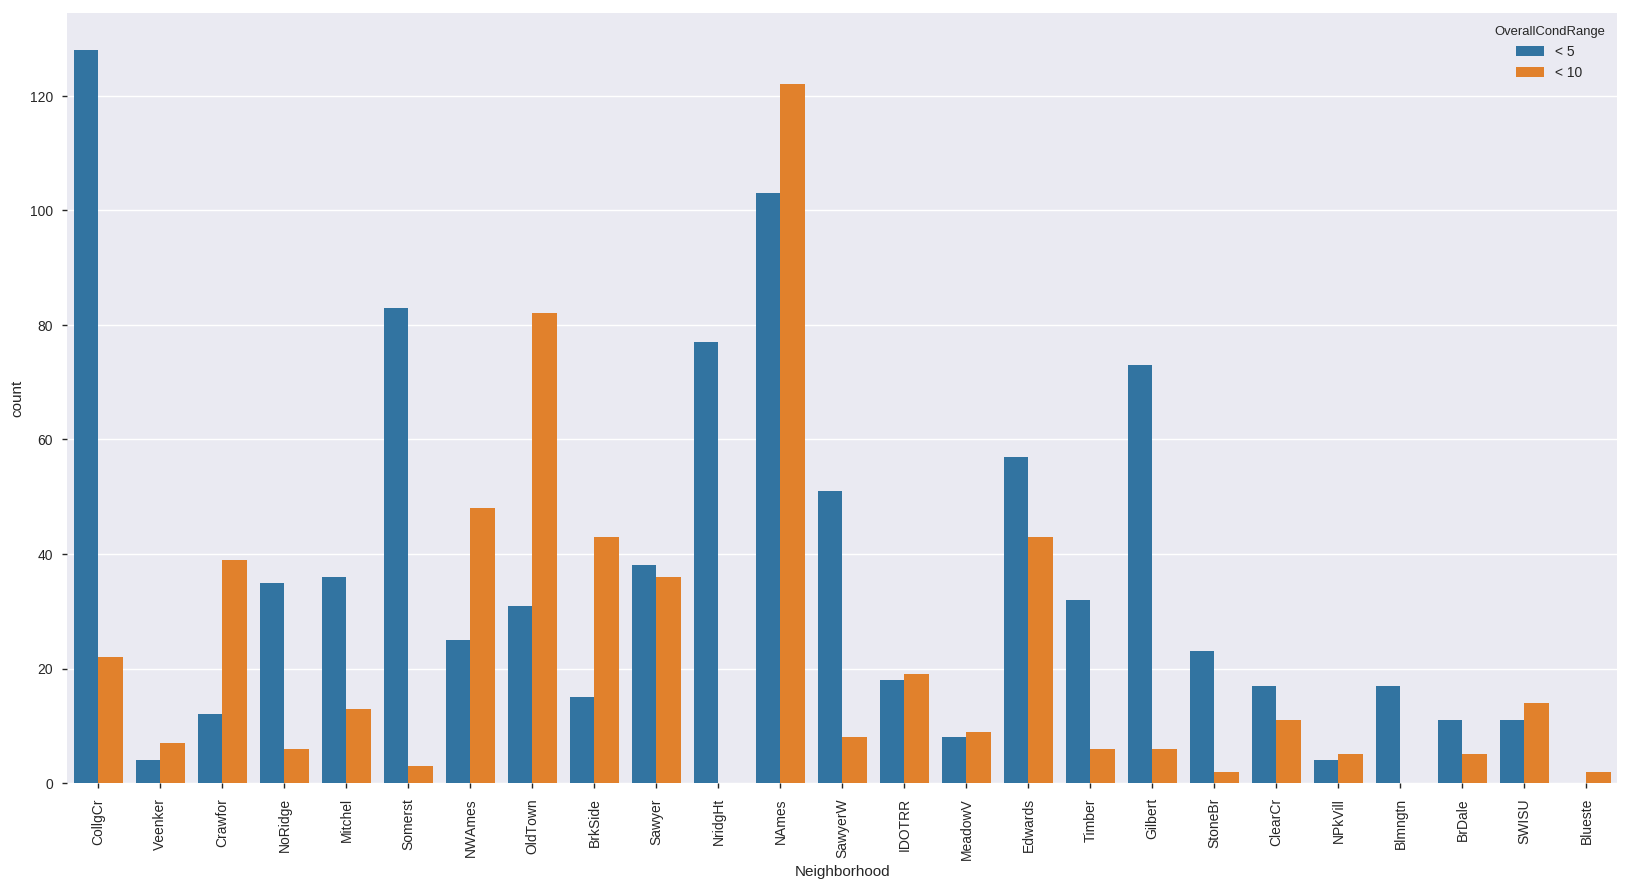

In [0]:
plt.figure(figsize=(20,10))
sb.countplot(x="Neighborhood",data=housedataAnalysis,hue="OverallCondRange")
plt.xticks(rotation=90)

Observations in above graph,


*   CollgCr neighborhood houses are having OverallCond in between 0 to 5.
*   NAmes neighborhood houses are having OverallCond in between 0 - 5 and 5 - 10. But Compared to all the neighborhood houses with OverallCond is high in NAmes.
*   All the houses in Blueste are having OverallCond in between 5 - 10.
*   All the houses in Blmngtn are having OverallCond in between 0 - 5.



### 7.3. What is the type of road access to the house?

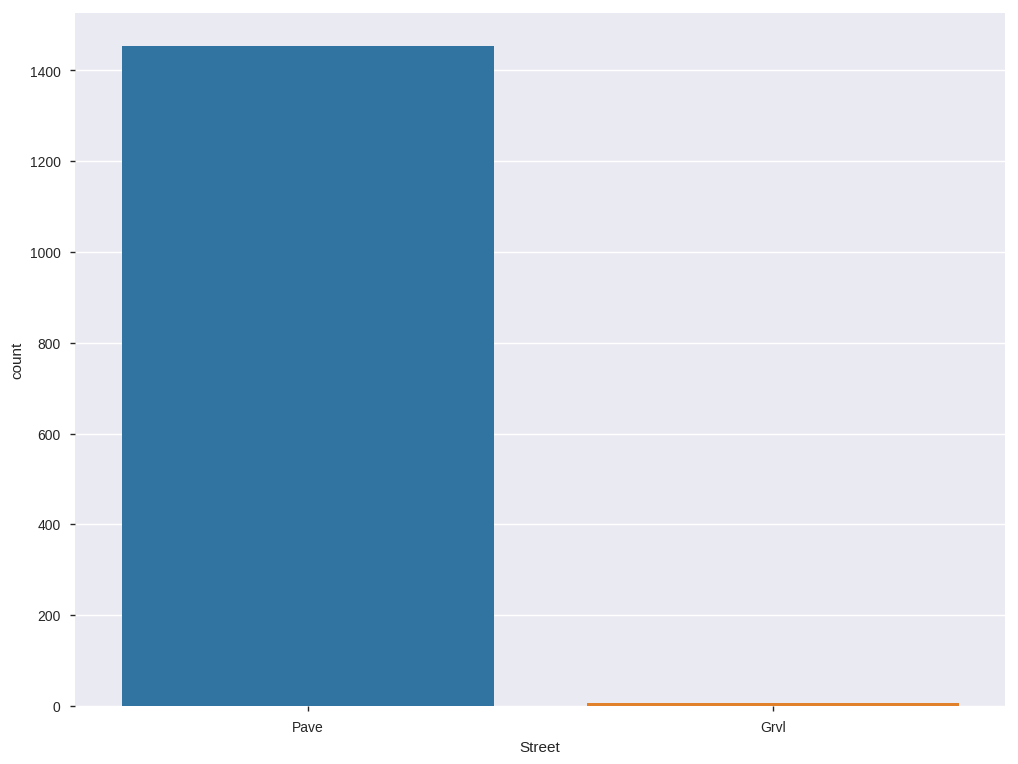

In [0]:
plt.figure(figsize=(12,9))
sb.countplot(x='Street',data=housedata)

Observations from above count plot,

*  98 % of the houses are having "Pave" road access to the houses. 

Seperate Continuous and Categorical variables into two different dataframes.

In [0]:
housedata_cat = housedata.select_dtypes(include ='object')
housedata_cont = housedata.select_dtypes(include =['int64','float64'])
print(housedata_cat.columns)
print(housedata_cont.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
       'OverallCondRange'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd

Draw Pair polt on selected columns from the dataset to see how the "SalePrice" related to independent variables.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


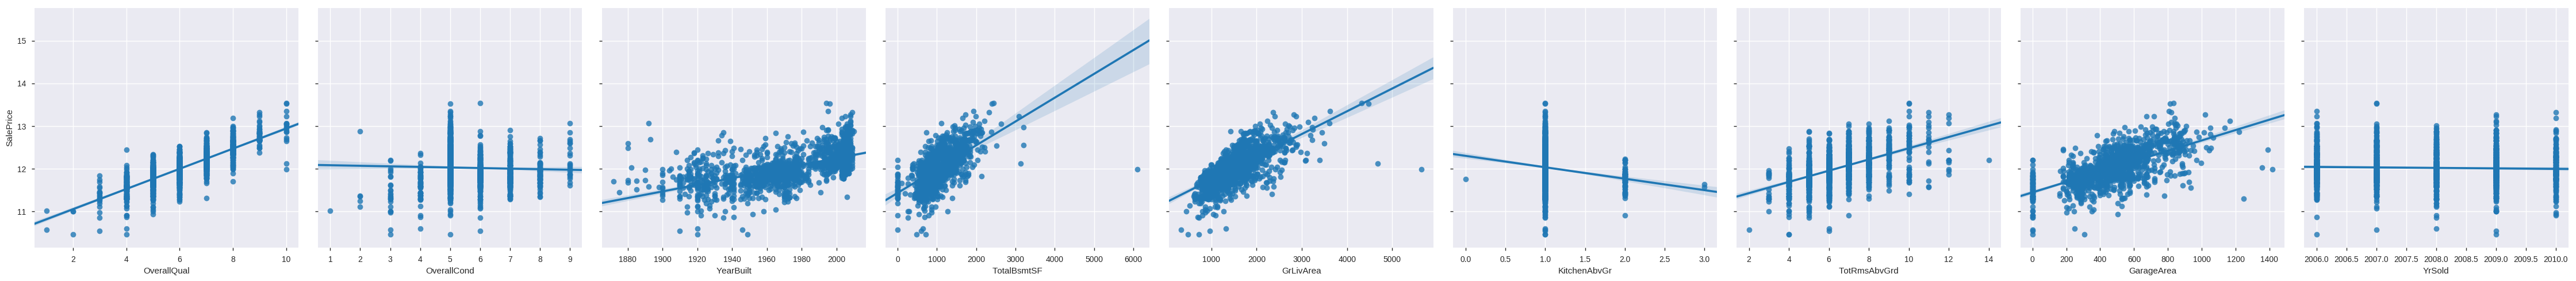

In [0]:
sb.pairplot(housedata,x_vars=['OverallQual','OverallCond','YearBuilt','TotalBsmtSF','GrLivArea','KitchenAbvGr','TotRmsAbvGrd','GarageArea','YrSold'],y_vars='SalePrice',size=5, aspect=1, kind='reg')

For variables TotalBsmtSF, GrLivArea, YearBuilt we can see the dots drawing a linear line.

### 7.4 Correlation between variables.

corr() function gives correlation between the variables. To show visually, we use heatmap to display the correlation values.

Text(0.5, 1.0, 'Correlation between features')

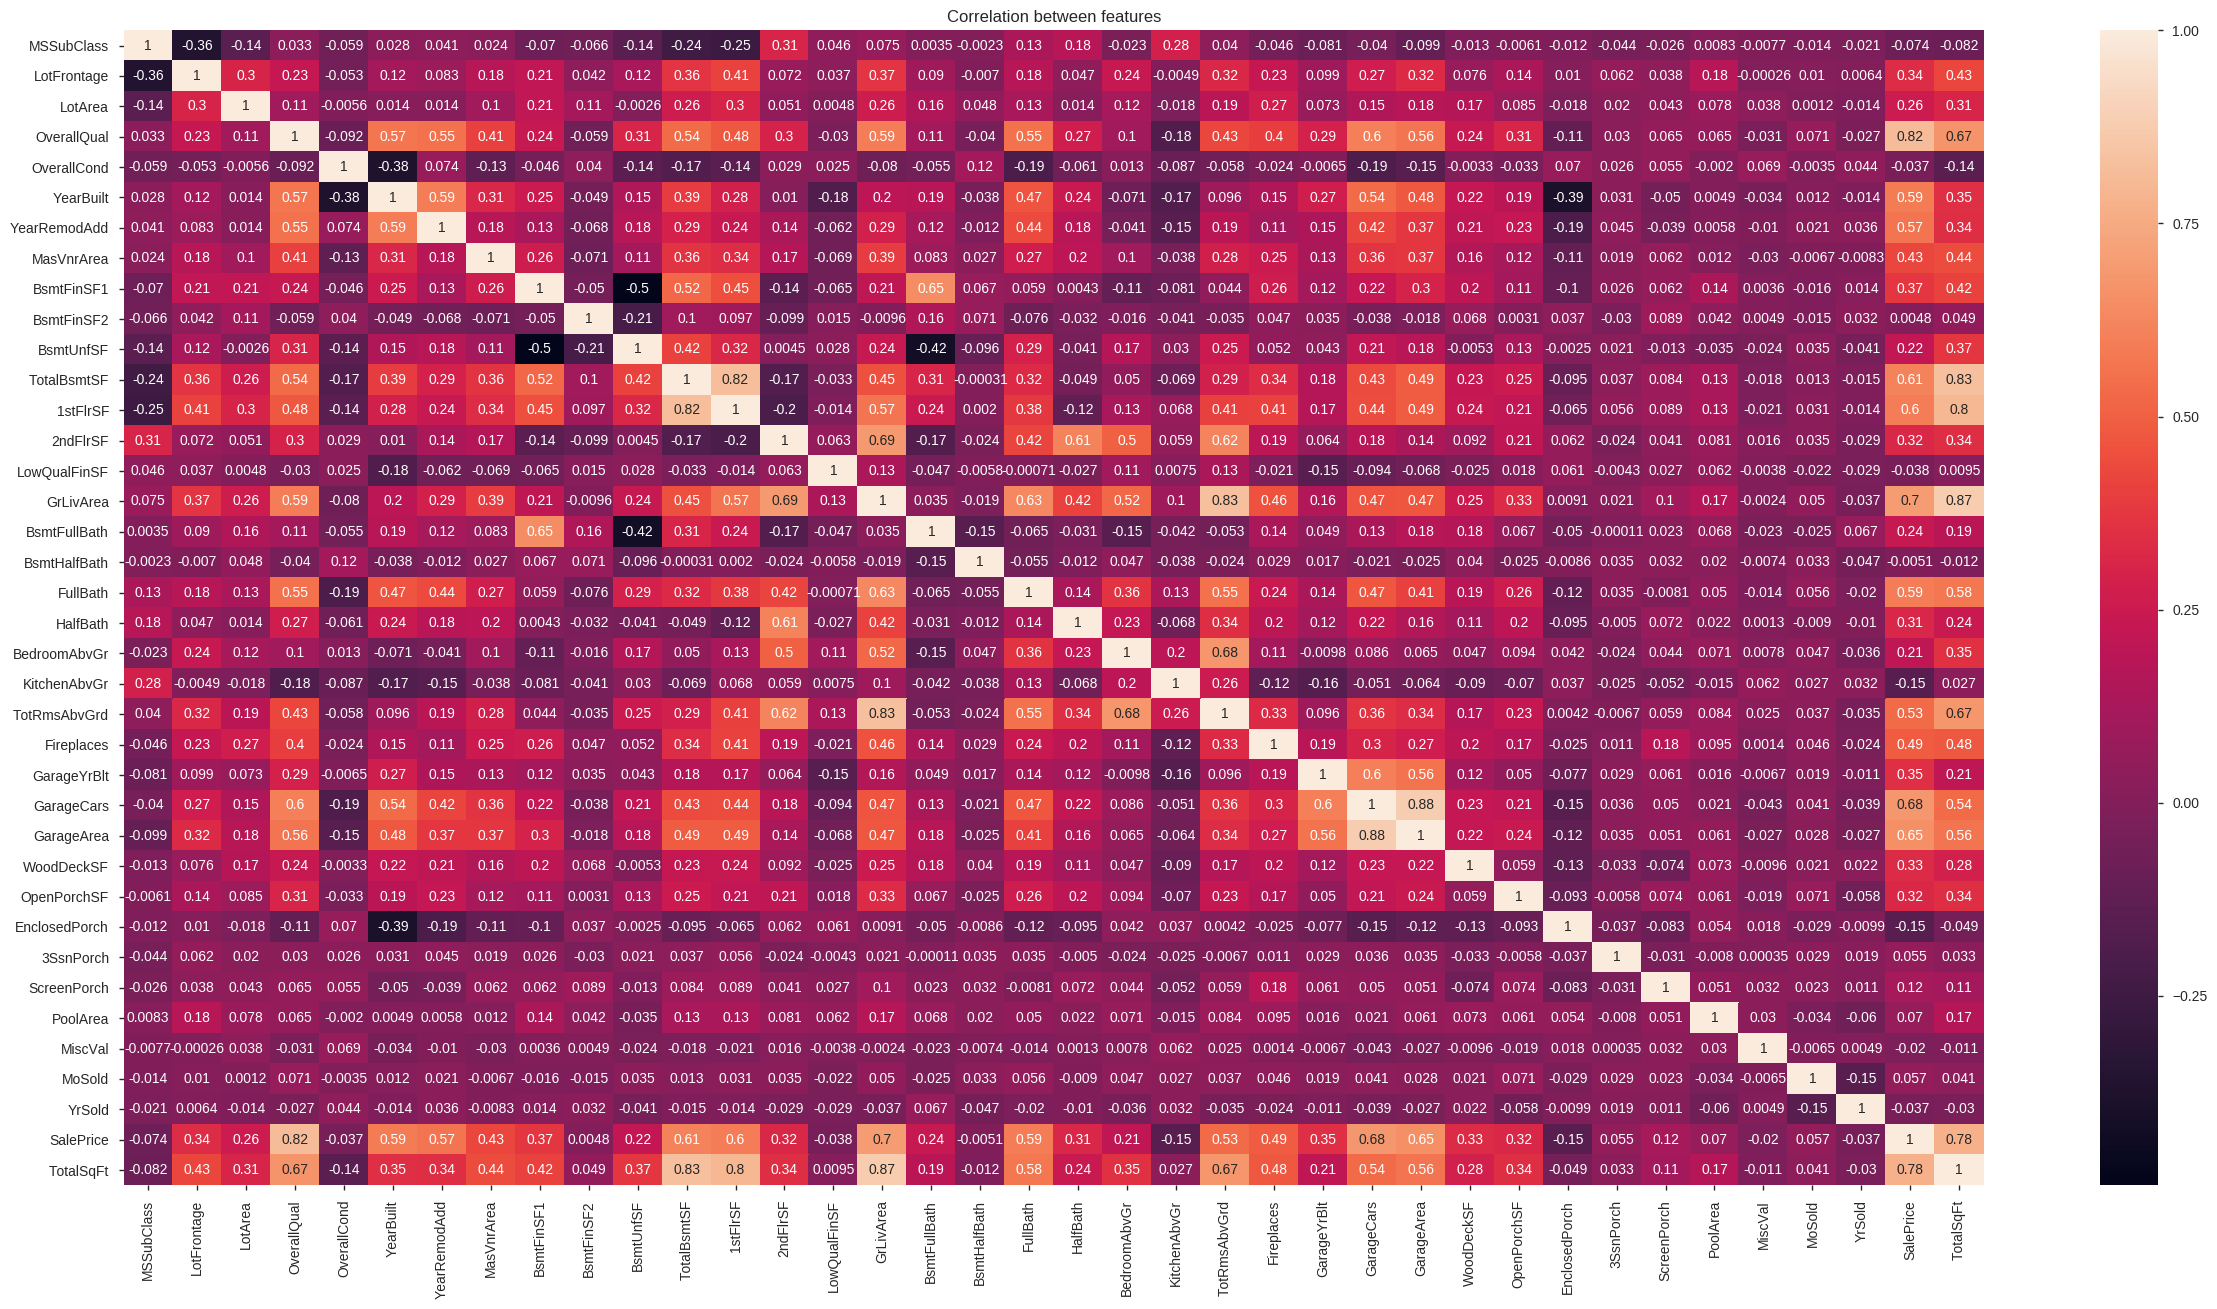

In [0]:
corr = housedata.corr()
plt.figure(figsize=(30,15))
sb.heatmap(corr,annot=True)
plt.title('Correlation between features')

Observations:

*  GrLivArea and TotalSqFt are highly correlated with each other.
*  OverallQual and SalePrice are highly correlated.
*  TotalBsmtSF and TotalSqFt are also highly correlated.
*  BsmtFinSF1 and BsmtUnfSF are high negatively correlated.
*  TotalBsmtSF and BsmtHalfBath are slightly negatively correlated.

### 7.5 Zoomed Heat Map

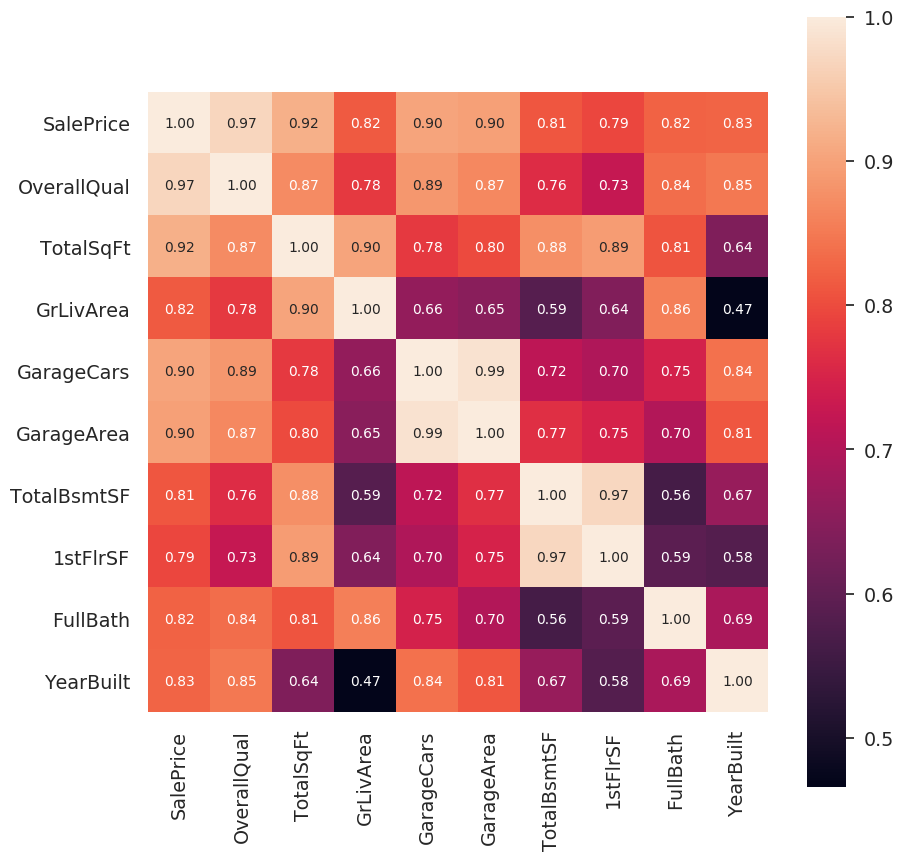

In [0]:
k = 10
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
corrMat = np.corrcoef(corr[cols].values.T)
plt.figure(figsize=(10,10))
sb.set(font_scale=1.25)
hm = sb.heatmap(corrMat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Observations:

*  OverallQual and SalePrice are highly positively correlated.
*  GrLivArea and YearBuilt are slightly positively correlated.

In [0]:
housedata_cat.columns
columnlist = housedata_cat.columns.to_list()

## 8. Feature Engineering

Label Encoder is used to transform categorical values to numerical values. Transformation can be done in other ways like "get_dummies".

In [0]:
from sklearn.preprocessing import LabelEncoder
for c in columnlist:
    le = LabelEncoder()
    le.fit(housedata[c].values)
    housedata[c] = le.transform(list(housedata[c].values))
    
housedata.shape

(1460, 78)

Remove one highly correlated independent variables using correlation matrix. If we have highly correlated variables in our model, then the results will not be accurate.

In [0]:
rows, cols = housedata.shape
flds = housedata.columns
l1 = list()
l2 = list()
corr = housedata.corr().values
for i in range(cols):
    for j in range(i+1,cols):
        if corr[i,j] > 0.7:
            if (flds[j] not in l1) & (flds[j] != "SalePrice"):
                l1.append(flds[j])
                l2.append(flds[i])

print(l1)
print(l2)

['BldgType', 'Exterior2nd', '1stFlrSF', 'TotalSqFt', 'TotRmsAbvGrd', 'GarageArea']
['MSSubClass', 'Exterior1st', 'TotalBsmtSF', 'TotalBsmtSF', 'GrLivArea', 'GarageCars']


Drop highly correlated labels from dataset.

In [0]:
housedata.drop(columns=l1,inplace=True)

## 9. Visualization of Highly Correlated Variables

Check the distribution of independent variables which are highly correlated with "SalePrice". Like "GrLivArea", "OverallQual" and "YearBuilt" are highly correlated with "SalePrice" compared to other labels in dataset. 

Text(0.5, 1.0, 'Relation between Living Area and Sale Price')

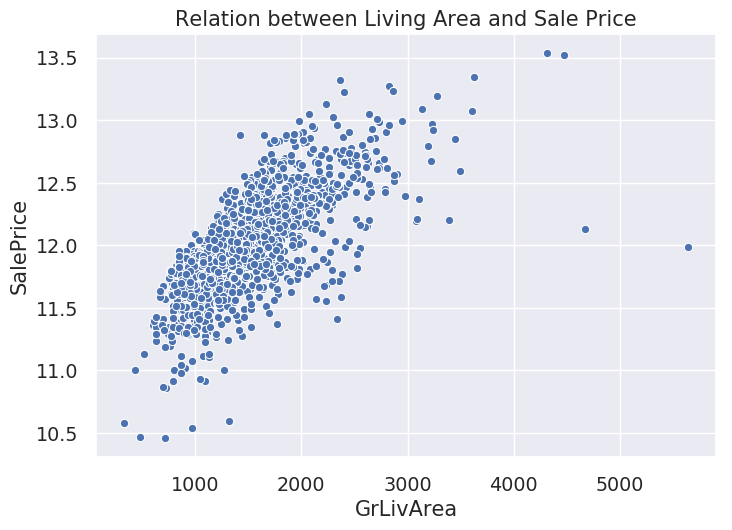

In [0]:
sb.scatterplot(x='GrLivArea',y='SalePrice',data=housedata)
plt.title("Relation between Living Area and Sale Price")

Observations:



*  There are few outliers present in the graph for living area below 600 and above 4000.
*  Most of the houses having Living Area in between 600 to 3000.



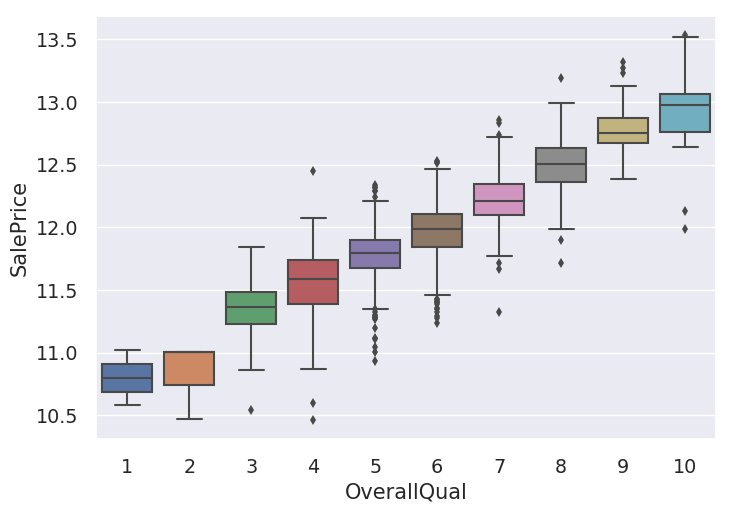

In [0]:
sb.boxplot(x='OverallQual',y='SalePrice',data=housedata)

Observations:

*   Outliers are more for OverallQual "5" compared to other values.
*   SalePrice is highly distributed at OverrallQual "4".
*   SalePrice is high for houses which are having OverallQual "10".


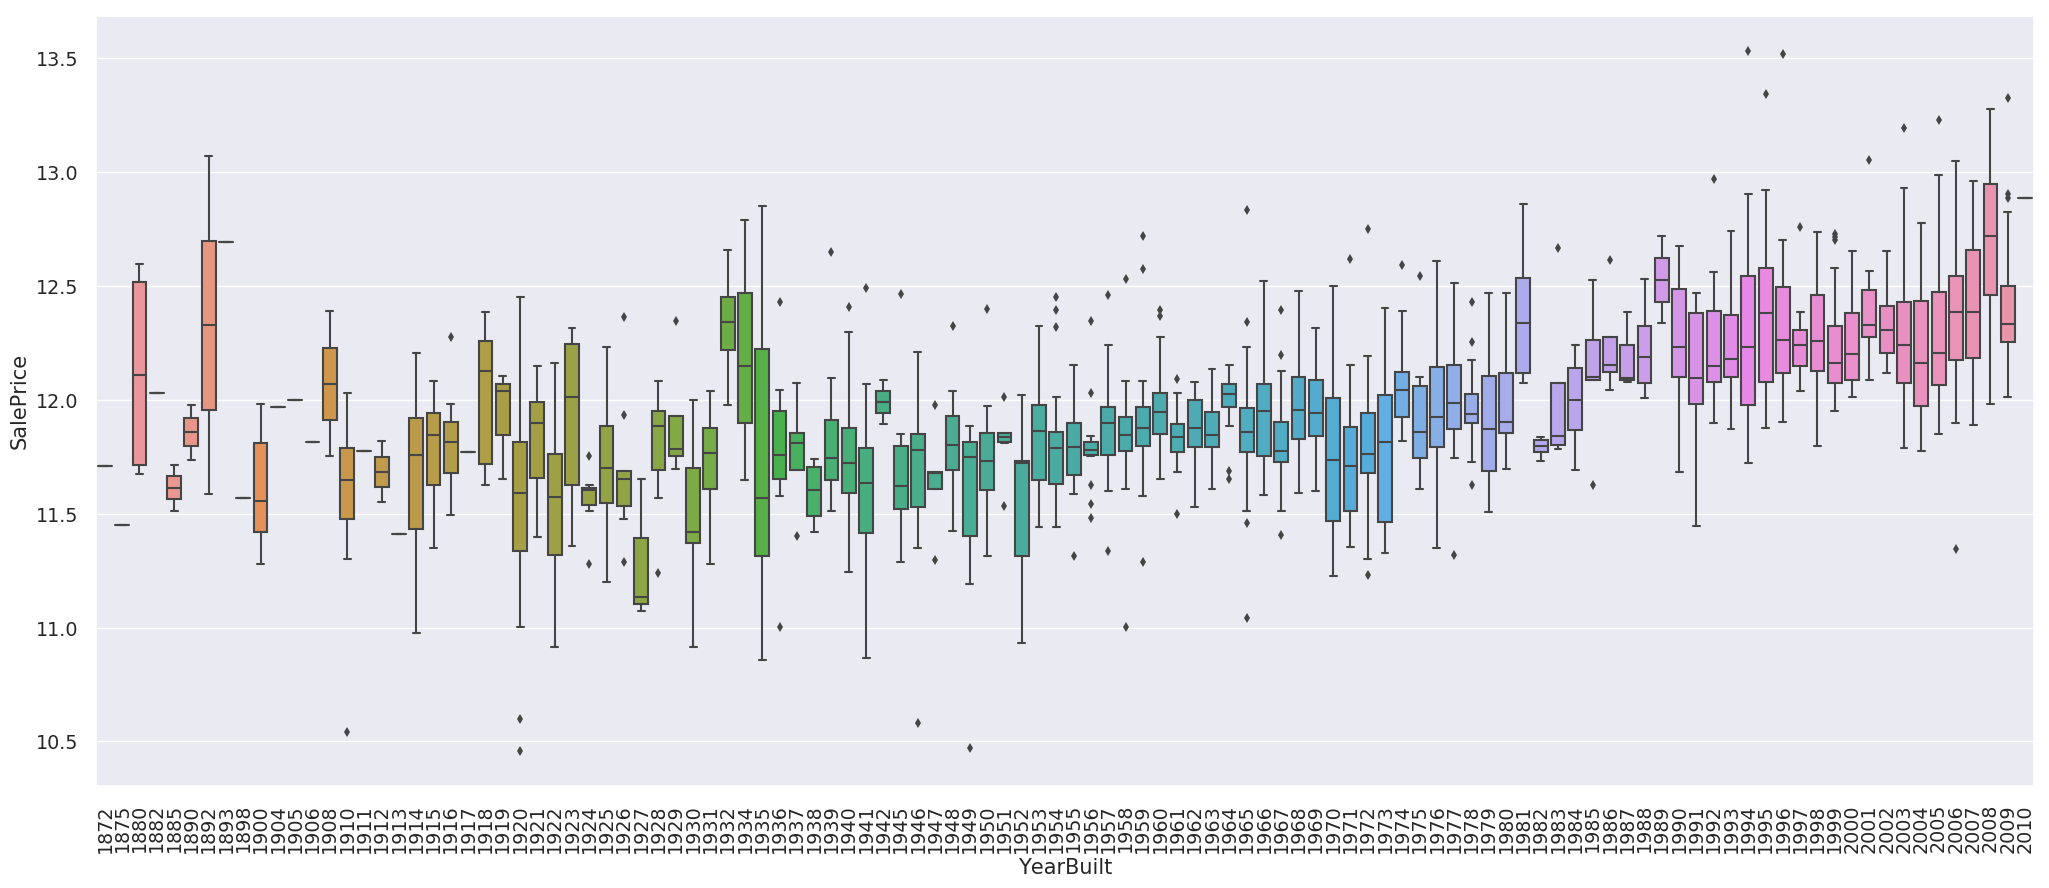

In [0]:
plt.figure(figsize=(25,10))
sb.boxplot(x='YearBuilt',y='SalePrice',data=housedata)
plt.xticks(rotation=90)
plt.show()

Observations:

*   Sale prices are high for the houses built in past 10 years.
*   There is continuous growth in Sale price of houses built in year 1989 to 2010.
*   SalePrices are highly distributed for the houses built in the year 1935.


##10. Model and Predictions

###10.1 Preparing X and y using pandas

Keep all the independent variables separately into X

In [0]:
X = housedata.loc[:,housedata.columns != 'SalePrice']

In [0]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1460, 71)


Create a dataframe with dependent variable "SalePrice" into y.

In [0]:
y = pd.DataFrame()
y = housedata['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [0]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1460,)


### 10.2 Splitting X and y into training and test datasets

Split X and y dataframes into training and testing dataset to make predictions. I have taken the size of the testing is 20%.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [0]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1168, 71)
y_train shape:  (1168,)

Test cases as below
X_test shape:  (292, 71)
y_test shape:  (292,)


##11. Linear Regression

###11.1 Linear Regression in scikit-learn

Import Linear Regression from sklearn and fit the training data into it.

In [0]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

You can see the intercept and coefficients for the training data.

In [0]:
print("Intercepts: ",linreg.intercept_)
print("Coefcients: ",linreg.coef_)

Intercepts:  22.568117341468508
Coefcients:  [-6.09722170e-04 -2.11215288e-02 -7.36903841e-04  1.99878646e-06
  4.57572906e-02 -6.75393146e-03  1.26071756e-02 -1.96696905e-01
 -6.91131624e-04  1.99693001e-02  6.63791225e-04  2.68814901e-03
 -4.32835428e-02  4.15662565e-04  7.18271298e-02  3.83525195e-02
  1.43042950e-03  7.67433052e-04  5.50156315e-03  7.14487180e-03
  5.57331478e-04  9.27399702e-03  1.79949566e-06 -1.28684350e-02
  1.25175617e-02  1.13572414e-02 -9.22753033e-03  1.08493618e-02
 -1.16312301e-02 -7.01475081e-03 -1.28386223e-05  4.65493606e-03
  4.31667350e-05 -9.80076199e-06  2.05273502e-05 -1.24987370e-02
 -6.04520564e-03  5.14528558e-02 -2.66170463e-03 -7.30696167e-05
 -3.13685693e-05  2.38586661e-04  5.86546128e-02  2.44485828e-02
  4.37319398e-02  1.93276545e-02  2.78917463e-02 -2.18035196e-02
 -2.32064965e-02  2.28461770e-02  3.87254811e-02 -8.06419303e-03
 -5.08824710e-03  1.82381086e-05 -4.41475848e-03  6.95208082e-02
 -7.30179330e-06 -4.86111995e-03  1.92124470e

### 11.2. Using the Model for Prediction

Using predict function, predict the y train and y test values.

In [0]:
y_pred_train = linreg.predict(X_train)

In [0]:
y_pred_test = linreg.predict(X_test)

###11.3  Finding Error Values

Calculate the Error values using Mean Squared Error,  Mean Absolute Error and RMSE.

In [0]:
from sklearn import metrics
mse_train = metrics.mean_squared_error(y_train,y_pred_train)
mse_test = metrics.mean_squared_error(y_test,y_pred_test)

In [0]:
print('MSE for training set is {}'.format(mse_train))
print('MSE for test set is {}'.format(mse_test))

MSE for training set is 0.018406940699822936
MSE for test set is 0.0207840829485939


In [0]:
MAE_train = metrics.mean_absolute_error(y_train,y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test,y_pred_test)

In [0]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.09201151114201415
MAE for test set is 0.0986244674411456


In [0]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))

In [0]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.13567218100930986
RMSE for test set is 0.14416685801041063


If you see, error values are very less for this model. So it is a good model.

##12. Decision Tree Regressor

 ### 12.1 Decision Tree in scikit-learn

* Fitting the model into Decision Tree Regressor.


In [0]:
from sklearn import tree

In [0]:
dectree = tree.DecisionTreeRegressor(random_state=0)
dectree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

###12.2 Using the model for prediction

In [0]:
y_pred_train  = dectree.predict(X_train)

In [0]:
y_pred_test = dectree.predict(X_test)

In [0]:
DecisionTreeAccuracy = metrics.r2_score(y_test,y_pred_test)
DecisionTreeAccuracy

0.7361704082079429

Here r2_score value is 74%. So the model is good for decision tree.

##13. Random Forest Regressor

###13.1 Random Forest in scikit-learn

In [0]:
from sklearn.ensemble import RandomForestRegressor
randForest = RandomForestRegressor(n_estimators=100,random_state=0)

In [0]:
randForest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

###13.2. Using the Model for Prediction

In [0]:
y_pred_train = randForest.predict(X_train)
y_pred_test = randForest.predict(X_test)

In [0]:
RandForestAccuracy = metrics.r2_score(y_test,y_pred_test)
RandForestAccuracy

0.8868877891466418

Here r2_score value is 89% which indicates this model is a good model.